In [1]:
import pickle
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import config
import os
import data_utils
from adjustText import adjust_text

In [2]:
experiment_name = 'test_h1_record'
file_name = '20190302201148_init_all_correct.pickle'

Read h1_logs/test_h1_record/20190302201148_ep2381.pickle


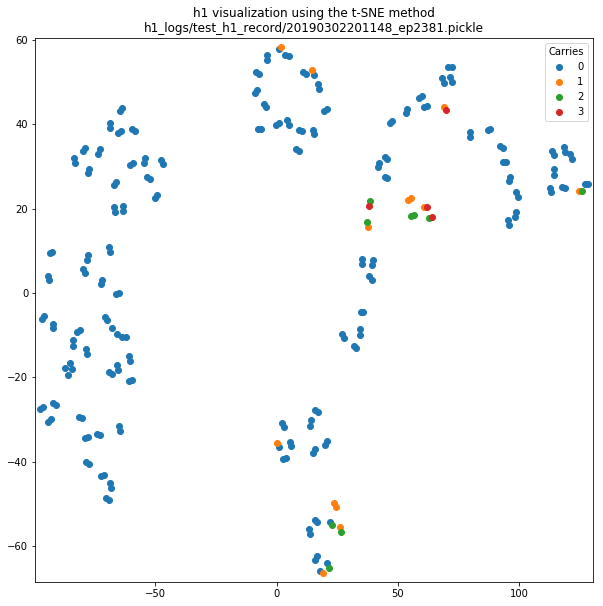

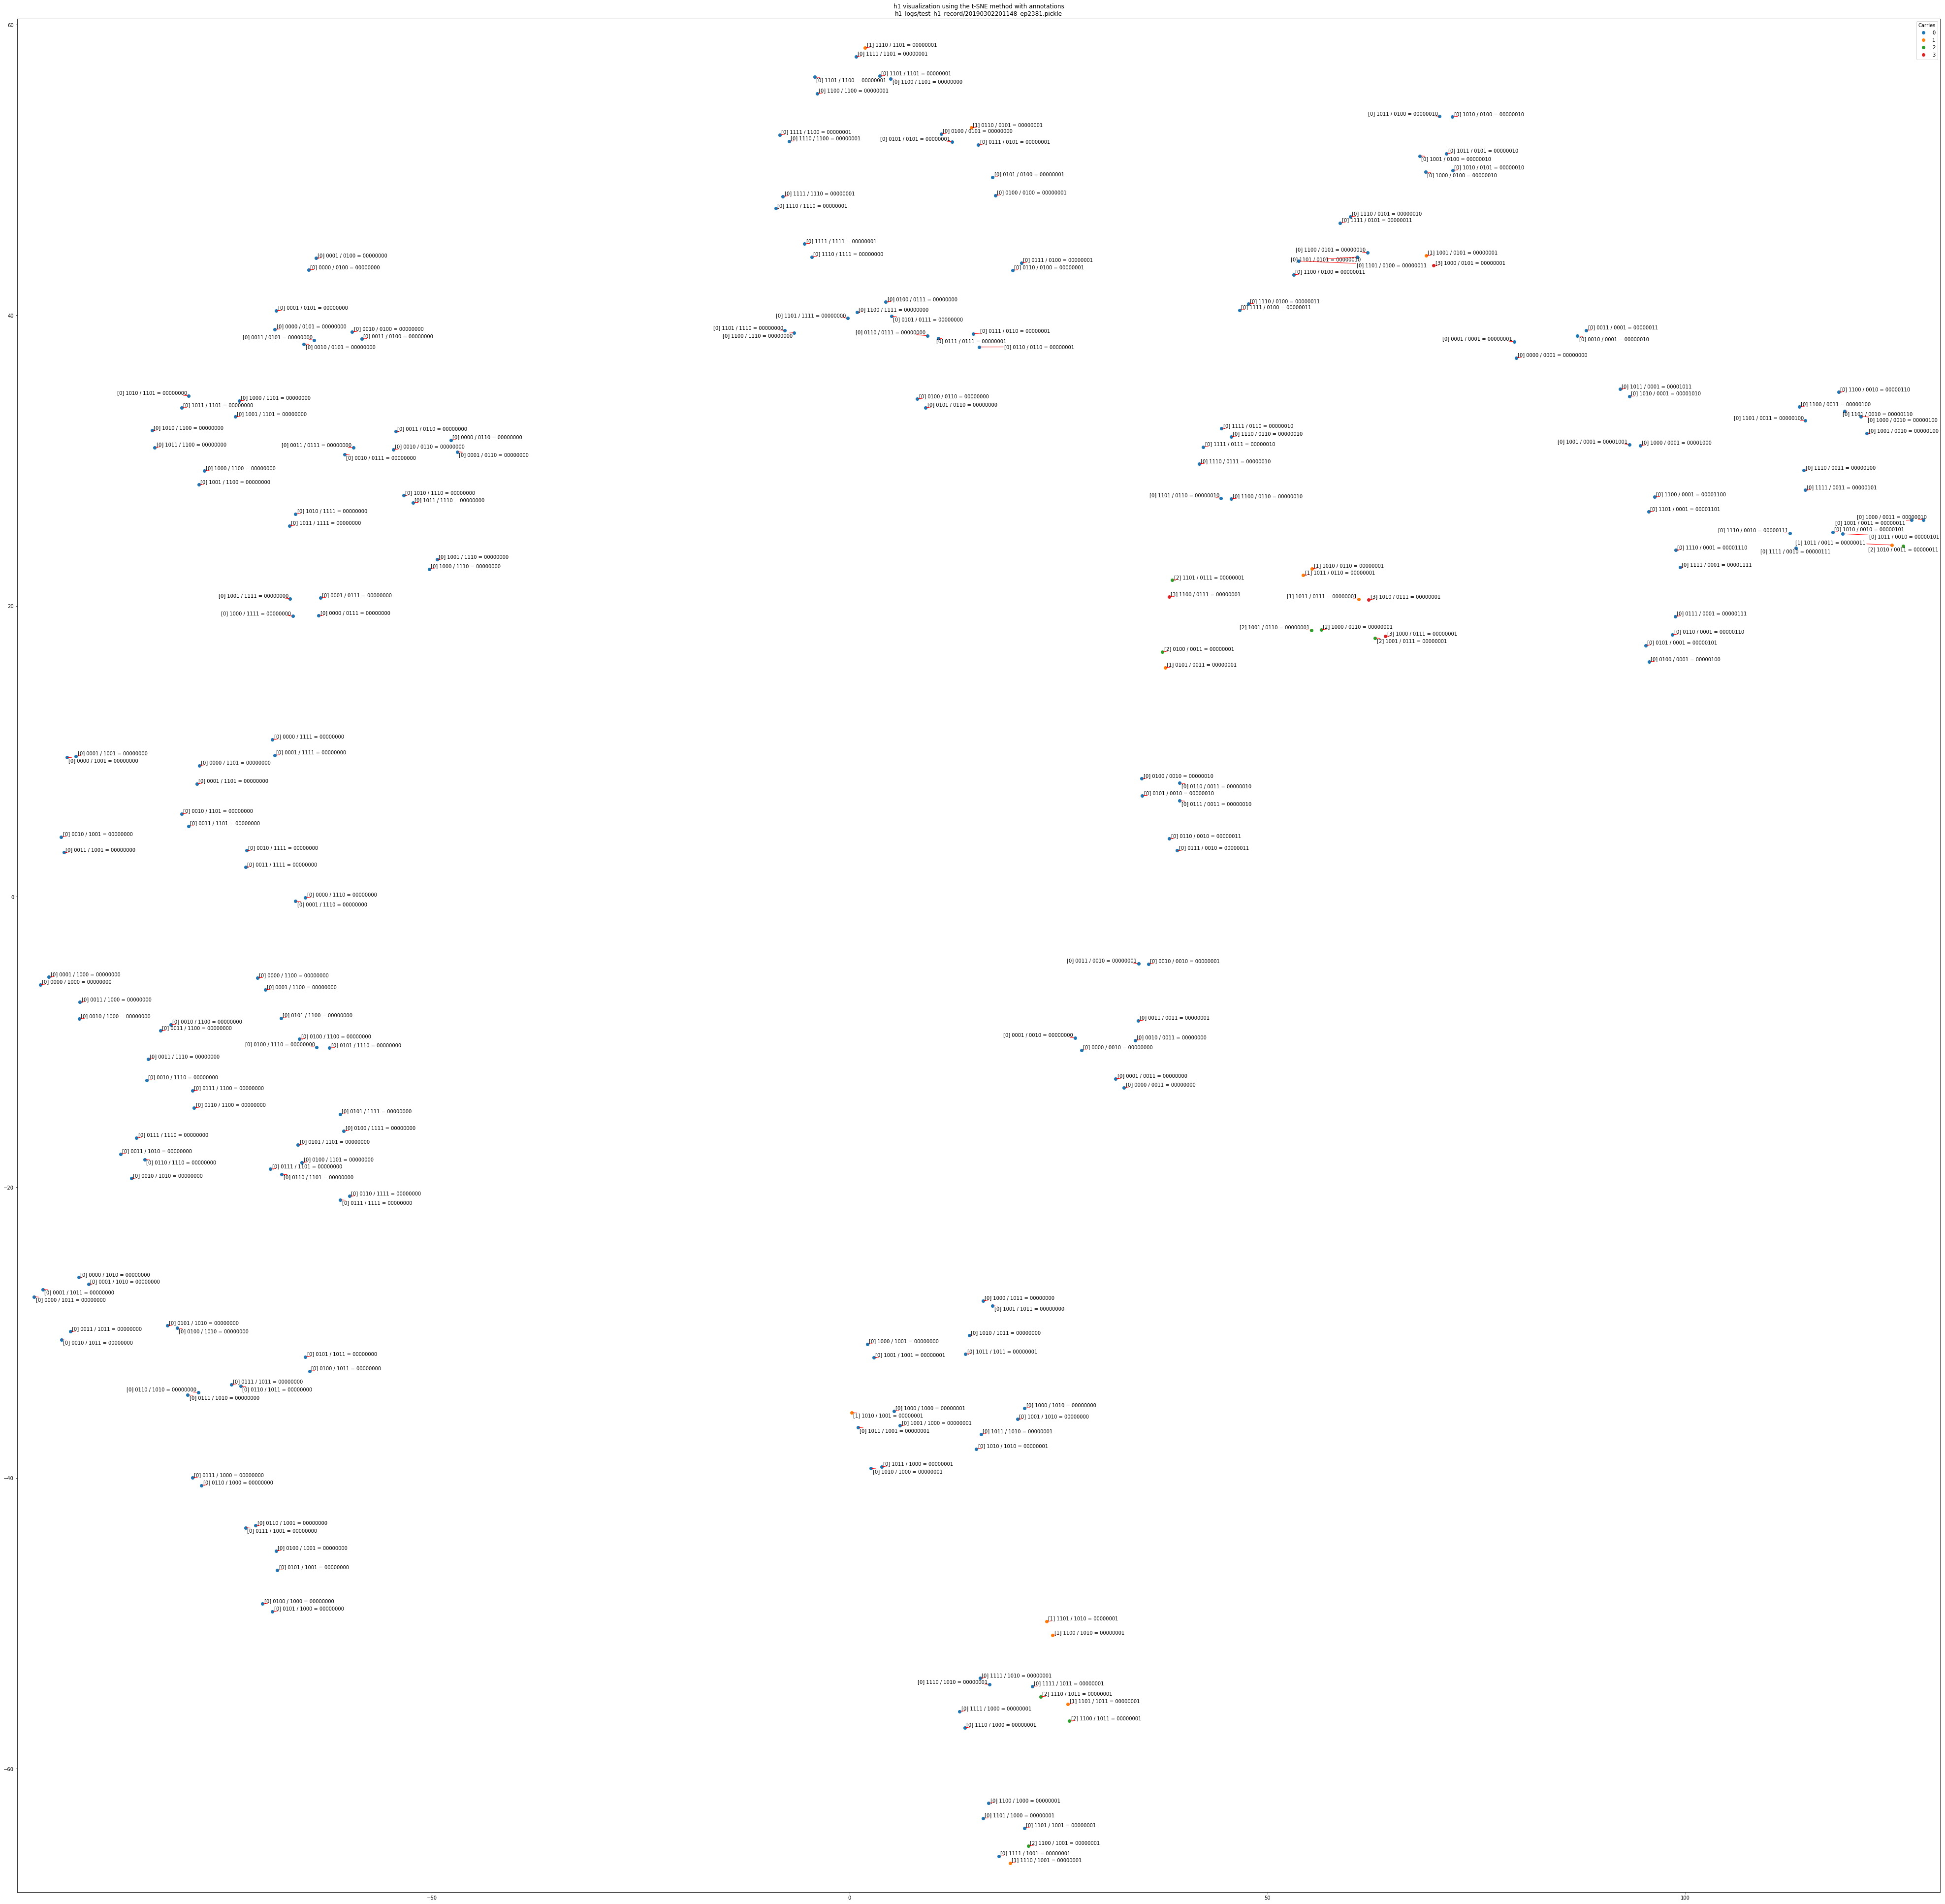

In [3]:
# Read the pickle file. ===============================================
file_path = os.path.join(config.dir_h1_logs(), experiment_name, file_name)
with open(file_path, 'rb') as f:
    data = pickle.load(f)
print('Read {}'.format(file_path))

# t-SNE training =======================================================
# t-SNE hyperparmeter setting
tsne = TSNE(n_components=2,  perplexity=5.0, n_iter=100000, init='pca')
# t-SNE fitting
X_2d = tsne.fit_transform(data['h1'])

# Create DataFrame containing data to plot. ============================
# Create annotation texts.
n_examples = data['h1'].shape[0]
op_texts = list()
for i in range(n_examples):
    op_text = '[{carries}] {str_operation}'.format(
        carries=data['carry'][i],
        str_operation=data_utils.np_io2str_op(data['input'][i], data['output'][i], data['operator'])
        )
    op_texts.append(op_text)

# Create DataFrame
df = pd.DataFrame({
    'x':X_2d[:,0],
    'y':X_2d[:,1],
    'carries':data['carry'],
    'op_text':op_texts
})

# Plot section ==========================================================    
# [Plot 1] Carry scatter plot ===========================================
# figure configuartion
plt.figure(figsize=(10,10))
pad = 2
plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
plt.title('h1 visualization using the t-SNE method\n{}'.format(file_path))

# scatter plot
for carries in df['carries'].unique():
    df_carries = df[df['carries'] == carries]
    plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)
plt.legend(title='Carries')
plt.show()

# [Plot 2] Plot with annotations ===========================================
# figure configuartion
plt.figure(figsize=(70,70))
pad = 2
plt.xlim(df['x'].min() - pad, df['x'].max() + pad)
plt.ylim(df['y'].min() - pad, df['y'].max() + pad)
plt.title('h1 visualization using the t-SNE method with annotations\n{}'.format(file_path))

# scatter plot
for carries in df['carries'].unique():
    df_carries = df[df['carries'] == carries]
    plt.plot(df_carries['x'], df_carries['y'], 'o', label=carries)

# tag labels
texts = list()
for i in range(len(df)):
    text = plt.text(df['x'][i], df['y'][i], df['op_text'][i], ha='center', va='center')
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
plt.legend(title='Carries')
plt.show()    